# Shortest Path in a Stochatic Network
*by Thibaut Rousseaux and Gabriel Razafindratsima*

## Problematic ##

&nbsp;&nbsp;&nbsp;In a network with fixed topology the throughput of arcs (hops) can change at each step. 

The task will be to **optimize the stochatic rules of routing the message**

## Approach ##

  &nbsp;&nbsp;&nbsp; In this first approach we will create a network with a fixed probability in each arcs (that the message will take the arcs). So the sum of the probability equal 1.

In [5]:
import numpy as np
import random as rm
import sys
import networkx as nx
from networkx.drawing.nx_agraph import write_dot
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import graphviz




### Init the Network

In [6]:
#States
states = ["1","2","3","4","5"]
numberStates = len(states)

#Sequence of events
events = [["11","12","13"],["22","23","24"],["33","34","35"],["44","45"]]

# Transition matrix
transitionMatrix = [[0.1,0.6,0.3],[0.1,0.7,0.2],[0.15,0.80,0.05],[0.1,0.9]]

if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
  sys.exit("Transition matrix doesn't have the awaited total")



### creating a NetworkX graph

In [7]:
#Graph
G = nx.MultiDiGraph()

#Filling edges for the graph
for i in range(0,len(events)):
  for e in range(0,len(events[i])):
    G.add_edges_from([tuple(list(events[i][e]))],weight=transitionMatrix[i][e],label=transitionMatrix[i][e])


#adding labels on edges
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

### Print the graph

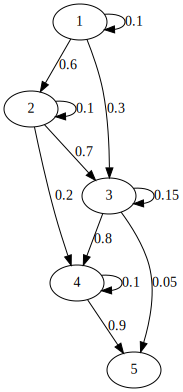

In [8]:
pos=nx.spring_layout(G)
write_dot(G,'graph.dot')



with open("graph.dot") as f:
    dot_graph = f.read()

# remove the display(...)

graphviz.Source(dot_graph)

### Function

    addToTab()  
is used to store all the data of the path

    activity()
is used to determine where the message will be sent

In [9]:
def addToTab(activityList):
  if not any(d.get('Path') == str(activityList) for d in tabStates):
    tabStates.append({
      "Path" : str(activityList),
      "count":1,
      "stepCount": len(activityList)-1
    })
  else:
    for d in tabStates:
      if(d.get('Path') == str(activityList)):
        d['count'] = d['count'] + 1


def activity(iteration):
  #Starting state
    i = 0
    while i != iteration:
      y = 0
      firstState ="1"
      activityList = [firstState]
      i += 1 
      while firstState != str(numberStates):
        pas = 0
        you = 1
        change = np.random.choice(events[y],replace=True,p=transitionMatrix[y])
        while pas != 1:
          if change == events[y][0]:
            activityList.append(events[y][0][-1])
            change = np.random.choice(events[y],replace=True,p=transitionMatrix[y])
          elif change == events[y][you]:
            newState = events[y][you][-1]
            firstState = newState
            activityList.append(newState)
            pas = 1
          else:
            you += 1
        y += 1
      addToTab(activityList)

### Launching the simulation

In [10]:
tabStates = []
# parameter to know the number of iterations (1 in order to make it work properly with 1 iteration )
activity(1000)


#### Sorting the tab and creating a dataFrame ####
tabStates = sorted(tabStates, key = lambda i: i['count'],reverse=True)

dfStates = pd.DataFrame(tabStates)

print(dfStates)

                                             Path  count  stepCount
0                       ['1', '2', '3', '4', '5']    294          4
1                       ['1', '3', '3', '4', '5']    161          4
2                       ['1', '2', '4', '4', '5']    101          4
3                       ['1', '3', '4', '4', '5']     39          4
4                  ['1', '2', '3', '3', '4', '5']     37          5
..                                            ...    ...        ...
72                      ['1', '1', '3', '3', '5']      1          4
73       ['1', '1', '2', '2', '4', '4', '4', '5']      1          7
74                 ['1', '1', '1', '2', '3', '5']      1          5
75  ['1', '1', '2', '2', '2', '3', '4', '4', '5']      1          8
76            ['1', '2', '4', '3', '4', '4', '5']      1          6

[77 rows x 3 columns]


### Example of exploitation of data

<AxesSubplot:xlabel='stepCount'>

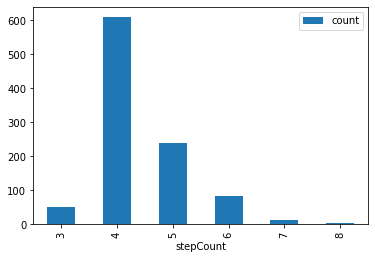

In [11]:
#### Creating a subset to compare the number of steps #####
subdfStates = dfStates[['count','stepCount']] 
subdfStates = subdfStates.groupby(['stepCount']).sum()
subdfStates.plot(kind='bar')

           count
stepCount       
3          0.102
4          1.320
5          1.796
6          1.964
7          1.990
8          2.000


<AxesSubplot:xlabel='stepCount'>

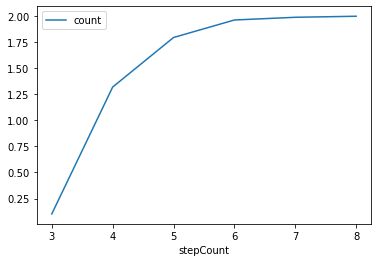

In [12]:
### Creating a subset to compare the probability of arrival depending of the time
graph = subdfStates.cumsum(axis=0)
graph = graph/500
print(graph)
graph.plot()

# TO DO : 

- **Implement a Function to change the probability of throughput**
- **Implement a Function to choose a path naively**
- **Implement the Function to optimize the path choosing**
- **Implement control Function**
- **generate 100 scenario**
- **Test first routing rule 100 times**